In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train=pd.read_csv("train.csv")
df_train.head()

,sentence,label
0,Ok brokeback mountain is such a horrible movie.,0
1,Brokeback Mountain was so awesome.,1
2,friday hung out with kelsie and we went and sa...,0
3,I am going to start reading the Harry Potter s...,1
4,"Is it just me, or does Harry Potter suck?...",0


In [4]:
pd.set_option("max_colwidth",800)
df_train.head()

,sentence,label
0,Ok brokeback mountain is such a horrible movie.,0
1,Brokeback Mountain was so awesome.,1
2,friday hung out with kelsie and we went and saw The Da Vinci Code SUCKED!!!!!,0
3,I am going to start reading the Harry Potter series again because that is one awesome story.,1
4,"Is it just me, or does Harry Potter suck?...",0


In [5]:
df_train.shape

(5668, 2)

* we have 5668 reviews in the dataset.
* label 0 is neagtive and label 1 is positive.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5668 entries, 0 to 5667
Data columns (total 2 columns):
sentence    5668 non-null object
label       5668 non-null int64
dtypes: int64(1), object(1)
memory usage: 88.7+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

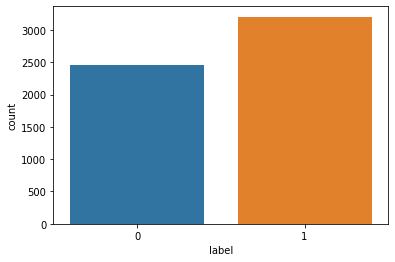

In [8]:
sns.countplot(df_train.label)
plt.show()

In [9]:
df_train.label.value_counts()

1    3204
0    2464
Name: label, dtype: int64

* we can infer that there are total 5668 records , out of that 3204 records belong to positive sentiments and 2464 records belong to negative sentiments. thus positive and negative sentiments have fairly equal representation in the dataset.

In [10]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv=CountVectorizer()
feature_vector=cv.fit(df_train.sentence)
features= feature_vector.get_feature_names()
print("Total number of festures:",len(features))

Total number of festures: 1903


In [12]:
features[200:210]

['blanks',
 'blashpemies',
 'blasphying',
 'bless',
 'blog',
 'blogbacklinksnippet',
 'blogbacklinktitle',
 'blonds',
 'blood',
 'board']

In [13]:
df_train_features=cv.transform(df_train.sentence)
type(df_train_features)

scipy.sparse.csr.csr_matrix

In [14]:
df_train_features.shape

(5668, 1903)

In [15]:
train=pd.DataFrame(df_train_features.todense())
train.columns=features

In [16]:
train.head()

,00,10,12,16,17,1984,1st,200,2007,286,...,yet,yip,you,young,younger,your,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_train[0:1]

,sentence,label
0,Ok brokeback mountain is such a horrible movie.,0


In [18]:
train[[ "brokeback", "mountain", "is", "such", "horrible", "movie"]][0:1]

,brokeback,mountain,is,such,horrible,movie
0,1,1,1,1,1,1


#### Removing Low frequency words

In [19]:
features_counts=np.sum(df_train_features.toarray(),axis=0)
feature_counts_df=pd.DataFrame(dict(features=features,counts=features_counts))

Text(0, 0.5, 'Density')

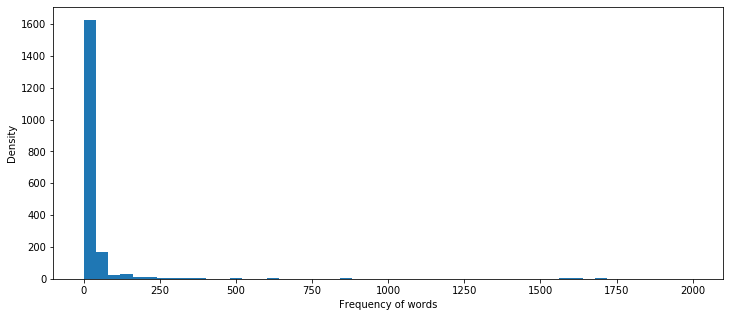

In [20]:
plt.figure(figsize=(12,5))
plt.hist(feature_counts_df.counts,bins=50,range=(0,2000))
plt.xlabel("Frequency of words")
plt.ylabel("Density")

In [21]:
len(feature_counts_df[feature_counts_df.counts==1])

1136

* There are 1228 words which are present only once across all the documents in the corpus. hese words can be ignored. We can restrict the number of features by setting max_features paramters to 1000 while creating the count vectors.

In [25]:
#Intitialize the count vectorizer
count_vectorizer=CountVectorizer(max_features=1000)
#create the dictionary from the corpus
feature_vector=count_vectorizer.fit(df_train.sentence)
#get the feature names
features=feature_vector.get_feature_names()
#transform the document into vectors
train_ds_features=count_vectorizer.transform(df_train.sentence)
#count the frequency of the features
features_counts=np.sum(train_ds_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features=features,counts=features_counts))

In [26]:
feature_counts.sort_values("counts",ascending=False)[0:10]

,features,counts
862,the,2656
44,and,1734
677,potter,1685
388,harry,1685
167,code,1616
934,vinci,1615
204,da,1615
125,brokeback,1591
579,mountain,1591
529,love,1312


* It can be noticed that the selected list of features contains words like "the", "and" etc . These words are irrelavant in determing the sentiments of the review. These words are called stop words and can be removed from the dictionary.

#### Removing the stop words

In [30]:
from sklearn.feature_extraction import text 
my_stop_words = text.ENGLISH_STOP_WORDS

print('Few pre-defined stop words are:',list(my_stop_words)[0:10])

Few pre-defined stop words are: ['anywhere', 'someone', 'under', 'anyway', 'otherwise', 'in', 'might', 'yours', 'could', 'across']


In [31]:
# We can also add our own stop words to the list.
my_stop_words = text.ENGLISH_STOP_WORDS.union(['harry','potter','da','vinci','code','mountain','movie','movies'])

In [32]:
# Creating count vectors without stop words
count_vectorizer = CountVectorizer(stop_words = my_stop_words,max_features=1000)
feature_vector=count_vectorizer.fit(df_train.sentence)
features = feature_vector.get_feature_names()
train_ds_features=count_vectorizer.transform(df_train.sentence)
# count the freq of features
feature_counts=np.sum(train_ds_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features = features, counts = feature_counts))

In [33]:
feature_counts.sort_values('counts',ascending=False)[0:15]

,features,counts
115,brokeback,1591
553,love,1312
62,awesome,907
593,mission,859
460,impossible,858
530,like,788
858,sucks,486
856,sucked,482
409,hate,458
726,really,297


* Now we have removed stop words but another problem is we can see words like sucks , sucked , suck i.e same word repeated multiple times in different forms.The vectorizer treats the two words as two separate words and hence creates two separate features. But, If the word has similar meaning in all its form, we cn use only the root word as a feature. **stemming** and **Lemmatization** are two popular techniques that are used to convert the words into root words.

In [34]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

# custom function for stemming and stop word removal
def stemmed_words(doc):
#stemming of words
    stemmed_words=[stemmer.stem(w) for w in analyzer(doc)]
# removing these words in stop words list
    non_stop_words= [word for word in stemmed_words if not word in my_stop_words]
    return non_stop_words

In [35]:
count_vectorizer = CountVectorizer(analyzer = stemmed_words,max_features=1000)
feature_vector=count_vectorizer.fit(df_train.sentence)
train_ds_features=count_vectorizer.transform(df_train.sentence)
feature_counts=np.sum(train_ds_features.toarray(),axis=0)
feature_counts=pd.DataFrame(dict(features = features, counts = feature_counts))
feature_counts.sort_values('counts',ascending=False)[0:15]

,features,counts
413,haven,1685
121,bullshit,1591
565,mainstream,1514
868,sure,1191
954,wanted,942
547,lord,933
615,nerd,922
63,awesomeness,910
607,nans,859
472,interested,858


#### Distribution of words across differnet sentiments

In [37]:
# Now we can see that all the words are reduced to there root words. Next lets classify them into sentiments.
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features
train_ds_df['sentiment']= df_train.label

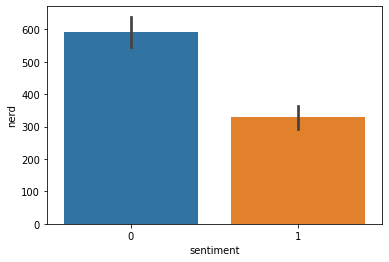

In [42]:
sns.barplot(x='sentiment', y = 'nerd', data = train_ds_df, estimator=sum)

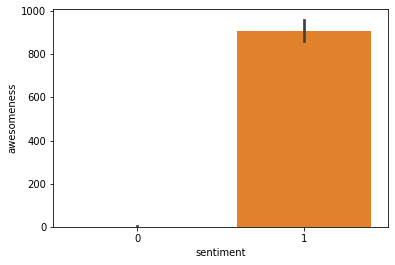

In [40]:
sns.barplot(x='sentiment', y = 'awesomeness', data = train_ds_df, estimator=sum)

## Naive-bayes model for sentiment classification

In [45]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_ds_features,train_ds_df.sentiment,test_size=0.3,random_state=100)

In [46]:
#build model
from sklearn.naive_bayes import BernoulliNB
nb_clf=BernoulliNB()
nb_clf.fit(X_train.toarray(),y_train)

BernoulliNB()

In [47]:
test_ds_predicted=nb_clf.predict(X_test.toarray())

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,test_ds_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       760
           1       0.99      0.99      0.99       941

    accuracy                           0.99      1701
   macro avg       0.99      0.99      0.99      1701
weighted avg       0.99      0.99      0.99      1701

